In [1]:
import pandas as pd

import matplotlib.pyplot as plt

plt.figure()
plt.close()

In [2]:
plt.rcParams.update({'font.size': 22})

In [3]:
FIGSIZE = (8,8)

In [4]:
data = pd.read_csv('./data/DataList.csv')

data.head()

,num,full_name,osmsc_id,image_id,sub_id,Modality,segtype,seg_subtype,gender,age
0,0,0001_0001,1.0,OSMSC0001,1,CT,cerebral,normal,F,30.0
1,1,0002_0001,2.0,OSMSC0002,1,CT,coronary,normal,F,63.0
2,2,0003_0001,3.0,OSMSC0003,1,CT,aortofemoral,normal,F,21.0
3,3,0004_0001,4.0,OSMSC0004,1,CT,aortofemoral,lower,F,23.0
4,4,0005_1001,5.0,OSMSC0005,1001,CT,Pulmonary,normal,F,67.0


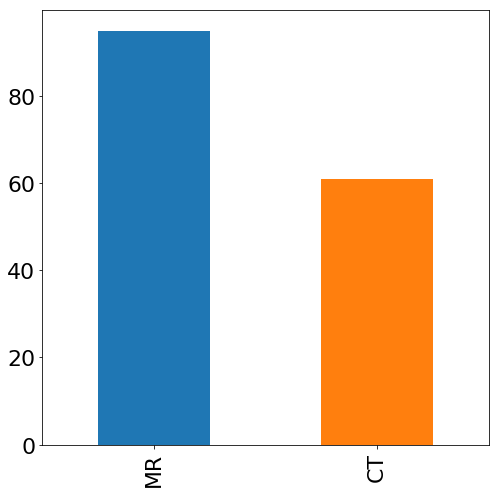

In [5]:
plt.figure(figsize=FIGSIZE)
data['Modality'].value_counts().plot(kind='bar')
plt.show()

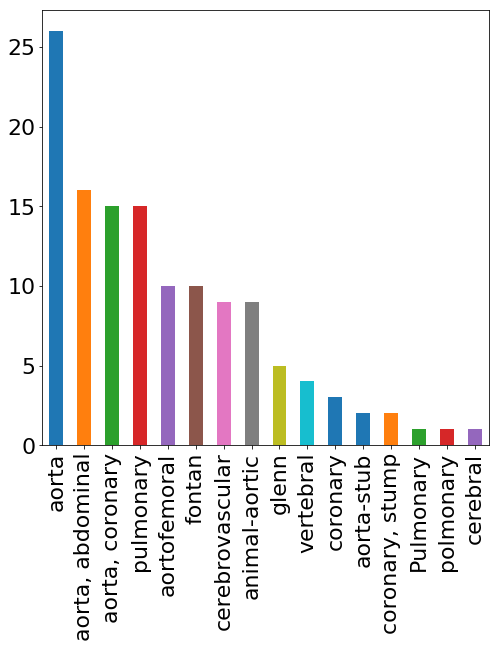

In [6]:
plt.figure(figsize=FIGSIZE)
data['segtype'].value_counts().plot(kind='bar')
plt.show()

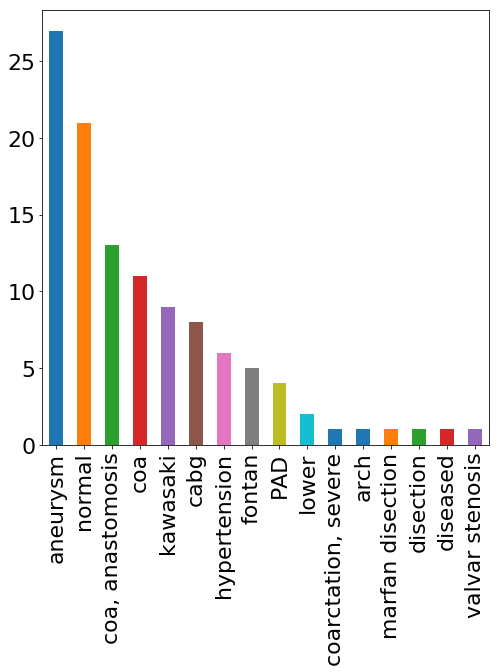

In [7]:
plt.figure(figsize=FIGSIZE)
data['seg_subtype'].value_counts().plot(kind='bar')
plt.show()

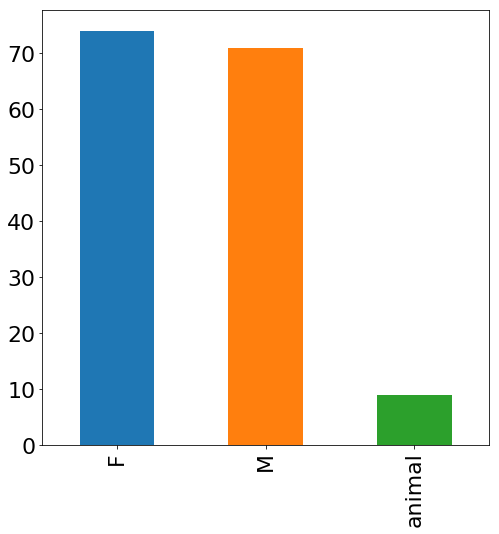

In [8]:
plt.figure(figsize=FIGSIZE)
data['gender'].value_counts().plot(kind='bar')
plt.show()

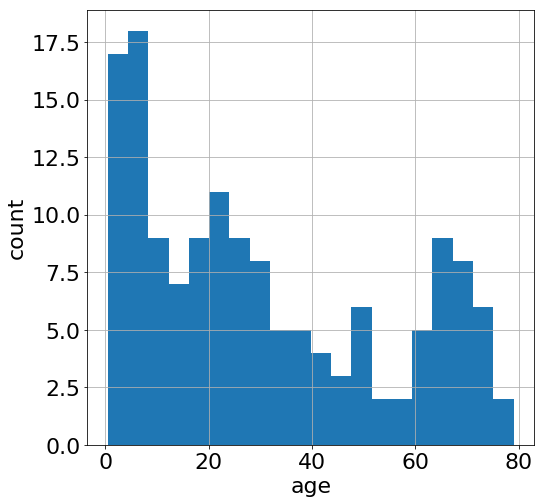

In [9]:
plt.figure(figsize=FIGSIZE)
data['age'].hist(bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [13]:
from modules import sv_image, vascular_data
import numpy as np

In [41]:
SPACING        = 0.05
IMAGE          = "cabg5"
RESLICE_EXTENT = 300
n              = np.array([0,0,1])
v              = np.array([0,1,0])

image_path = './data/images/{}/image.mha'.format(IMAGE)
seg_path   = './data/images/{}/segmentation.mha'.format(IMAGE)

In [42]:
image_sv = sv_image.Image(image_path)
image_sv.set_spacing(SPACING)
image_sv.set_reslice_ext(RESLICE_EXTENT)

seg_sv   = sv_image.Image(seg_path)
seg_sv.set_spacing(SPACING)
seg_sv.set_reslice_ext(RESLICE_EXTENT)

In [51]:
origin           = np.array(image_sv.image.GetOrigin())
extent           = np.array(image_sv.image.GetExtent())
original_spacing = np.array(image_sv.image.GetSpacing())
center           = origin+extent[1::2]*original_spacing/2

print(origin)
print(extent)
print(center)

[-16.0331   0.     -24.5625]
[  0 511   0 511   0 393]
[ -8.01655757   8.01654243 -12.28125   ]


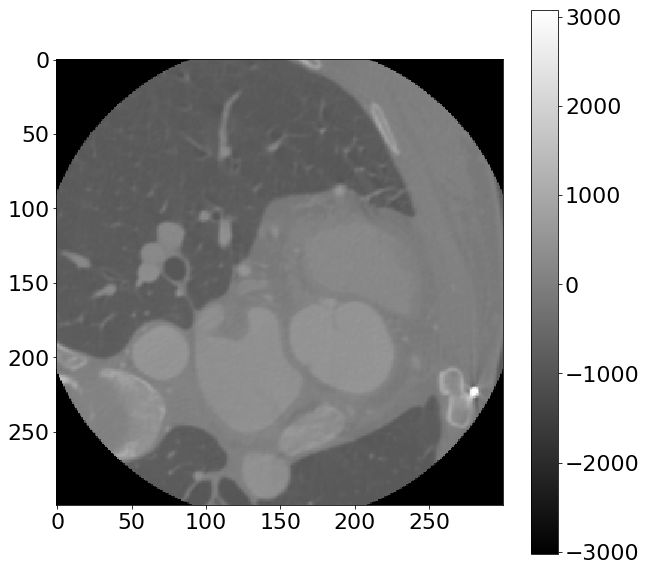

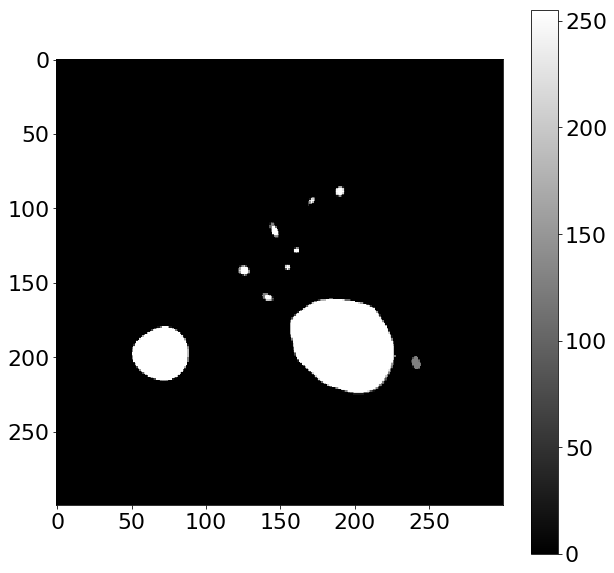

In [52]:
#p = np.array([0,0,0])
p = center

x = image_sv.get_reslice(p,n,v)
y = seg_sv.get_reslice(p,n,v)

plt.figure(figsize=(10,10))
plt.imshow(x, cmap='gray')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(y, cmap='gray')
plt.colorbar()
plt.show()

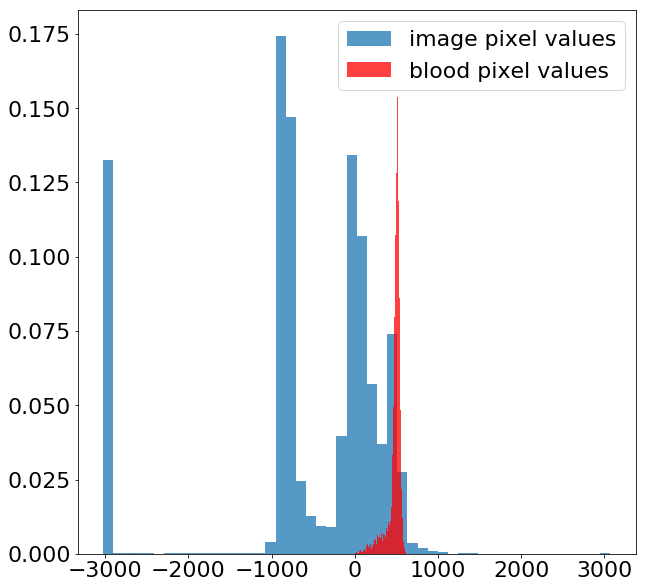

In [54]:
im_pix     = np.ravel(x)
im_weights = np.zeros_like(im_pix) + 1. / im_pix.size

blood_pix     = np.ravel(x[y>100])
blood_weights = np.zeros_like(blood_pix) + 1. / blood_pix.size

plt.figure(figsize=(10,10))
plt.hist(im_pix, weights=im_weights, bins=50, alpha=0.75, 
         label='image pixel values')
plt.hist(blood_pix, weights=blood_weights, color='red', bins=50, alpha=0.75, 
         label='blood pixel values')
plt.legend()
plt.show()